In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#read files, initial info

In [4]:
credit_train = pd.read_csv('Data/cs-training.csv')
print("Number of rows: %i" % credit_train.shape[0])
print("Number of columns: %i" % credit_train.shape[1])
credit_train.head()

Number of rows: 150000
Number of columns: 12


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
credit_test = pd.read_csv('Data/cs-test.csv')
print("Number of rows: %i" % credit_test.shape[0])
print("Number of columns: %i" % credit_test.shape[1])
credit_test.head()

Number of rows: 101503
Number of columns: 12


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [8]:
# Copy original datasets so that we have them in case we make changes to them

In [9]:
credit_train_original = credit_train.copy()
credit_test_original = credit_test.copy()

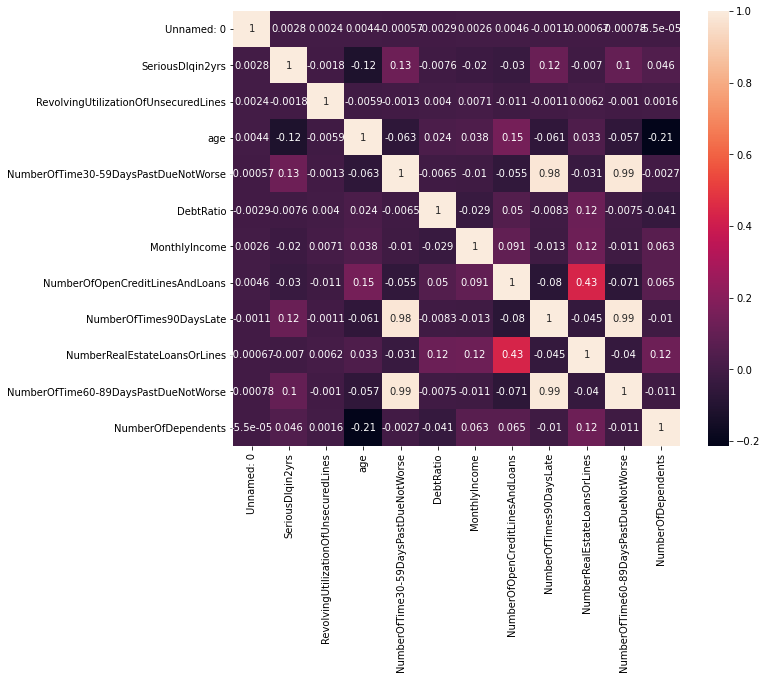

In [10]:
# Initial correlation matrix

corr = credit_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g");

In [11]:
# Important correlation among past due fields
# Some correlation between credit line fields 

In [12]:
# Initial findings: 
# - all data is numeric, 
# - column Unnamed, useful??,  
# - number of nulls in MonthlyIncome and NumberOfDependents.
# Going forward work on train dataset. Any change will have to be applied to test as well. 

In [13]:
credit_train['Unnamed: 0'].describe()

count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: Unnamed: 0, dtype: float64

In [14]:
# This is an id. No use for analysis. Can be dropped

In [15]:
credit_train.drop('Unnamed: 0', axis=1, inplace=True)
credit_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
# Understand the data
credit_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [17]:
# Understand the data
credit_train['MonthlyIncome'].describe().apply("{0:.2f}".format)

count     120269.00
mean        6670.22
std        14384.67
min            0.00
25%         3400.00
50%         5400.00
75%         8249.00
max      3008750.00
Name: MonthlyIncome, dtype: object

In [18]:
# Items to investigate:
# - Age: from 0 to 109??
# - Number of dependents: max of 20??
# - Monthly Income: up to 3008750?
# - DebtRatio. Defined as percentage: 'Monthly debt payments, alimony,living costs divided by monthly gross income'.
#   How can it go to 329664?
# - Open line fields: up to 54 and 58??
# - RevolvingUtilizationOfUnsecuredLines. Defined as percentage: 'Total balance on credit cards and personal 
#   lines of credit except real estate and no installment debt like car loans divided by the sum
#   of credit limits'. How could it have a maximum of 50708?
# - Past due fields: all have max of 98?


In [19]:
# UNIVARIATE ANALYSIS
# Target variable - SeriousDlqin2yrs

In [20]:
credit_train['SeriousDlqin2yrs'].describe()

count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [21]:
credit_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [22]:
# Small number and % of value 1
credit_train['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

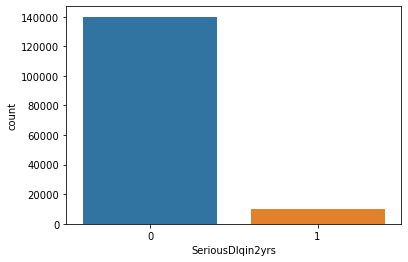

In [23]:
sns.countplot(x='SeriousDlqin2yrs',data=credit_train);

In [24]:
# UNIVARIATE ANALYSIS
# Age
credit_train['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [25]:
plt.style.use('seaborn-whitegrid')

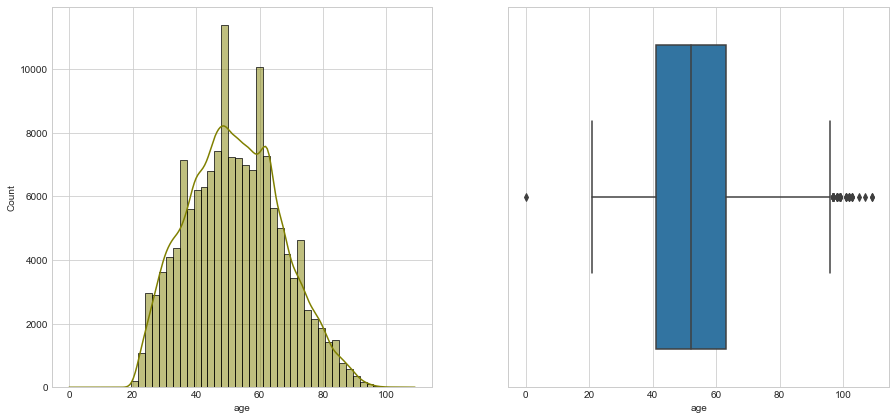

In [26]:
f, axes = plt.subplots(nrows=1,
                       ncols=2, 
                       figsize=(15,7)) 
sns.histplot(data=credit_train['age'], color="olive", ax=axes[0], bins=50, kde=True);
sns.boxplot(data=credit_train, ax=axes[1], x='age');

In [27]:
# Age - Outliers
credit_train[credit_train['age']<20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [28]:
# One value of Age=0. Potential entry error. Will change to median age.
credit_train.loc[credit_train['age'] == 0, 'age'] = credit_train.age.median()
# Check
credit_train[credit_train['age']<20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [29]:
# UNIVARIATE ANALYSIS
# Number of dependents
credit_train['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [30]:
credit_train['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

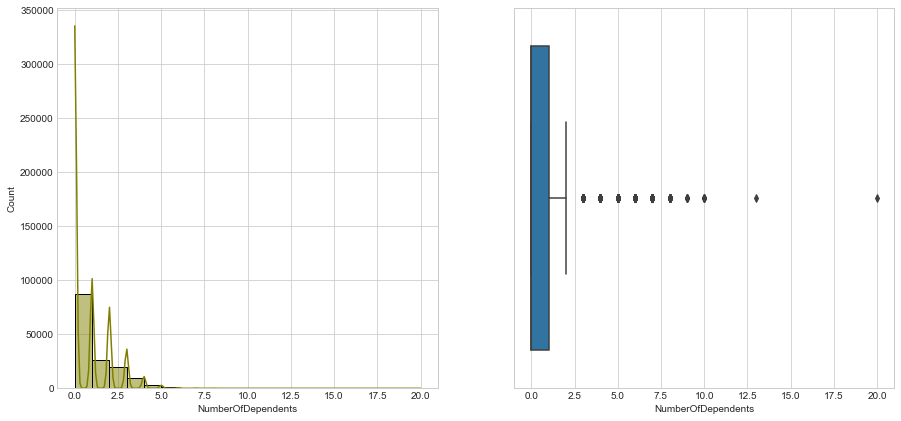

In [31]:
f, axes = plt.subplots(nrows=1,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['NumberOfDependents'], color="olive", ax=axes[0], bins=20, kde=True);
sns.boxplot(data=credit_train, ax=axes[1], x='NumberOfDependents');

In [32]:
credit_train[credit_train['NumberOfDependents']>=10]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6299,0,0.226616,40.0,1,0.576539,6316.0,11,2,1,0,20.0
10618,0,0.000000,44.0,0,0.035590,12896.0,5,0,0,0,10.0
12982,0,0.325828,39.0,0,0.027100,4833.0,6,0,0,0,10.0
22698,0,0.139466,43.0,1,3621.000000,0.0,9,0,1,0,10.0
39095,0,0.079194,60.0,0,0.133582,7500.0,10,0,0,0,10.0
123911,0,0.017858,47.0,1,0.368932,9166.0,7,0,1,0,10.0
128034,0,1.000000,53.0,1,0.230054,3333.0,3,1,1,0,13.0


In [33]:
# Remove outlier - 1 row - number of dependents=20
credit_train = credit_train[credit_train['NumberOfDependents']!=20]
credit_train[credit_train['NumberOfDependents']>=10]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
10618,0,0.000000,44.0,0,0.035590,12896.0,5,0,0,0,10.0
12982,0,0.325828,39.0,0,0.027100,4833.0,6,0,0,0,10.0
22698,0,0.139466,43.0,1,3621.000000,0.0,9,0,1,0,10.0
39095,0,0.079194,60.0,0,0.133582,7500.0,10,0,0,0,10.0
123911,0,0.017858,47.0,1,0.368932,9166.0,7,0,1,0,10.0
128034,0,1.000000,53.0,1,0.230054,3333.0,3,1,1,0,13.0


In [34]:
# Number of dependents - Missing values
credit_train['NumberOfDependents'].isnull().sum()

3924

In [35]:
credit_train['NumberOfDependents'].describe()

count    146075.000000
mean          0.757091
std           1.113953
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          13.000000
Name: NumberOfDependents, dtype: float64

In [36]:
credit_train['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
Name: NumberOfDependents, dtype: int64

In [37]:
# We will assign the mode (also median, 0 dependents, as shown above) to the rows with NaN
credit_train['NumberOfDependents'].fillna(0, inplace=True)

In [38]:
#Check
credit_train['NumberOfDependents'].isnull().sum()

0

In [39]:
# UNIVARIATE ANALYSIS
# Debt Ratio. Defined as "Monthly debt payments, alimony,living costs divided by monthy gross income"

credit_train['DebtRatio'].describe().apply("{0:.2f}".format)

count    149999.00
mean        353.01
std        2037.83
min           0.00
25%           0.18
50%           0.37
75%           0.87
max      329664.00
Name: DebtRatio, dtype: object

In [40]:
# Max is incredibly high as per definition of ratio. We are talking about individuals.
# Let's check when it changes

for i in range(80, 100, 1):
    print('Quantile ', i, ': ', credit_train.DebtRatio.quantile(i/100))

Quantile  80 :  4.0
Quantile  81 :  14.0
Quantile  82 :  31.0
Quantile  83 :  61.0
Quantile  84 :  121.0
Quantile  85 :  269.3000000000029
Quantile  86 :  453.0
Quantile  87 :  635.0
Quantile  88 :  846.0
Quantile  89 :  1056.0
Quantile  90 :  1267.0
Quantile  91 :  1462.0
Quantile  92 :  1685.0
Quantile  93 :  1917.140000000014
Quantile  94 :  2172.1199999999953
Quantile  95 :  2449.0
Quantile  96 :  2791.0
Quantile  97 :  3225.0
Quantile  98 :  3839.0
Quantile  99 :  4979.079999999958


In [41]:
# Let's look into the records with Debt ratio > quantile 90 (approx. 10% of the records remaining)
credit_train[(credit_train['DebtRatio'] > 1267)]['DebtRatio'].count()

14995

In [42]:
# Let's check those records re: Monthly Income, and our target variable SeriousDlqin2yrs
credit_train[(credit_train['DebtRatio'] > 1267)][['MonthlyIncome', 'SeriousDlqin2yrs']].describe()

,MonthlyIncome,SeriousDlqin2yrs
count,849.000000,14995.000000
mean,0.195524,0.049817
std,0.396837,0.217573
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [43]:
credit_train[(credit_train['DebtRatio'] > 1267)]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.950183
1    0.049817
Name: SeriousDlqin2yrs, dtype: float64

In [44]:
# We see that out of the 14995 records with Debt ratio > 1267:
# - only 849 have an actual value in Monthly Income
# - of those with an actual value in Monthly Income, this is either 0 or 1
# Also, despite owing > 1267 times their monthly gross income, these individuals aren't defaulting any more than the general
# population (in fact, less). We can conclude that these entries must be data-entry errors, so we will remove them from our model

In [45]:
# Drop
credit_train = credit_train[credit_train['DebtRatio'] <= 1267]

In [46]:
# Check
credit_train['DebtRatio'].describe().apply("{0:.2f}".format)

count    135004.00
mean         45.96
std         185.67
min           0.00
25%           0.15
50%           0.33
75%           0.59
max        1267.00
Name: DebtRatio, dtype: object

In [47]:
# Majority of records are between 0 and 1 - makes sense

(np.sum(credit_train['DebtRatio'].apply(lambda x: 1 if 0<= x <=1 else 0)) / len(credit_train['DebtRatio'])) * 100

85.08044206097597

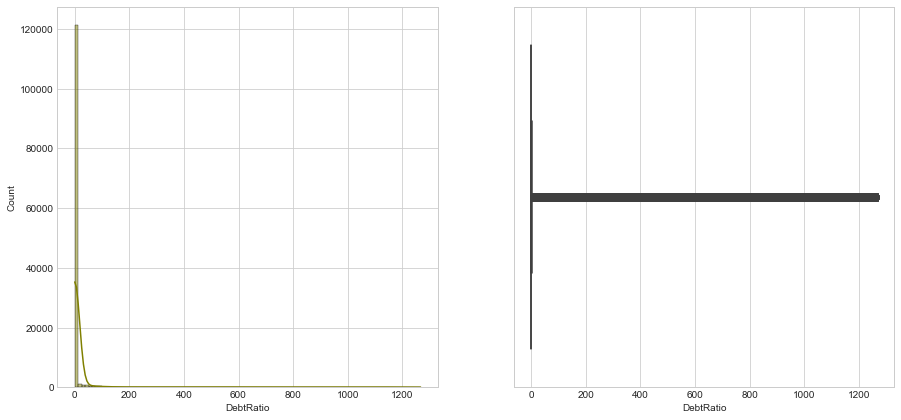

In [48]:
f, axes = plt.subplots(nrows=1,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['DebtRatio'], color="olive", ax=axes[0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1], x='DebtRatio');

In [49]:
# UNIVARIATE ANALYSIS
# Revolving Utilization Of Unsecured Lines.
# Defined as "Total balance on credit cards and personal lines of credit except real estate and no 
# installment debt like car loans divided by the sum of credit limits". Percentage.

credit_train['RevolvingUtilizationOfUnsecuredLines'].describe().apply("{0:.2f}".format)

count    135004.00
mean          5.57
std         243.87
min           0.00
25%           0.03
50%           0.16
75%           0.57
max       50708.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: object

In [50]:
# Again, we find that max is incredibly high as per the definition of this ratio.
# Let's check when and how it changes

for i in range(80, 101, 1):
    print('Quantile ', i, ': ', credit_train.RevolvingUtilizationOfUnsecuredLines.quantile(i/100))

Quantile  80 :  0.7126317512000003
Quantile  81 :  0.74245289374
Quantile  82 :  0.77322102768
Quantile  83 :  0.80522123759
Quantile  84 :  0.8355371008399999
Quantile  85 :  0.86604956185
Quantile  86 :  0.8937582028600001
Quantile  87 :  0.9199704016799999
Quantile  88 :  0.94562041192
Quantile  89 :  0.9679514581499999
Quantile  90 :  0.9884891271
Quantile  91 :  0.9999998999999999
Quantile  92 :  0.9999998999999999
Quantile  93 :  0.9999998999999999
Quantile  94 :  0.9999998999999999
Quantile  95 :  0.9999998999999999
Quantile  96 :  0.9999998999999999
Quantile  97 :  0.9999998999999999
Quantile  98 :  1.0083198704000003
Quantile  99 :  1.099800399
Quantile  100 :  50708.0


In [51]:
# As per above, we can see reasonable ratios up to quantile 99
# Let's study those records with ratios above quantile 99 against the target variable.
# Outlier values appear to be way too high
# Default rates compared with the rest of the population

print(credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] <= 1.1].SeriousDlqin2yrs.value_counts(normalize=True))
print()
print(credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] > 1.1].SeriousDlqin2yrs.value_counts(normalize=True))

0    0.934571
1    0.065429
Name: SeriousDlqin2yrs, dtype: float64

0    0.603858
1    0.396142
Name: SeriousDlqin2yrs, dtype: float64


In [52]:
# Outliers (> 1.1) appear to be defaulting more than the overall population, which makes sense. Is this consistent?
for i in range(1, 21, 1):
    print('Threshold ', i, '- Default rate: ', 
          credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] >= i].SeriousDlqin2yrs.value_counts(normalize=True)[1])

Threshold  1 - Default rate:  0.37224176527022707
Threshold  2 - Default rate:  0.1588785046728972
Threshold  3 - Default rate:  0.11020408163265306
Threshold  4 - Default rate:  0.09502262443438914
Threshold  5 - Default rate:  0.08490566037735849
Threshold  6 - Default rate:  0.08173076923076923
Threshold  7 - Default rate:  0.0825242718446602
Threshold  8 - Default rate:  0.07804878048780488
Threshold  9 - Default rate:  0.07389162561576355
Threshold  10 - Default rate:  0.07389162561576355
Threshold  11 - Default rate:  0.07389162561576355
Threshold  12 - Default rate:  0.06930693069306931
Threshold  13 - Default rate:  0.06
Threshold  14 - Default rate:  0.06
Threshold  15 - Default rate:  0.05583756345177665
Threshold  16 - Default rate:  0.05583756345177665
Threshold  17 - Default rate:  0.05583756345177665
Threshold  18 - Default rate:  0.05583756345177665
Threshold  19 - Default rate:  0.05583756345177665
Threshold  20 - Default rate:  0.05583756345177665


In [53]:
# Default rates are not consistent and do not appear to make sense: the worse the ratio (more money owed), the less 
# the default rate
# I will remove those records (Threshold  4)
credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] >= 4]['RevolvingUtilizationOfUnsecuredLines'].count()

221

In [54]:
# Drop these 221 records from the dataset
credit_train = credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] < 4]

In [55]:
# Check
credit_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    134783.000000
mean          0.326307
std           0.363693
min           0.000000
25%           0.029851
50%           0.156746
75%           0.568337
max           3.996008
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [56]:
# UNIVARIATE ANALYSIS
# Past due fields: NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate.
# - NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
# - NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
# - NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.

In [57]:
credit_train['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    134783.000000
mean          0.441755
std           4.416345
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [58]:
credit_train['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    134783.000000
mean          0.261257
std           4.381697
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [59]:
credit_train['NumberOfTimes90DaysLate'].describe()

count    134783.000000
mean          0.288783
std           4.395571
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [60]:
# We can see these 3 variables are very similar

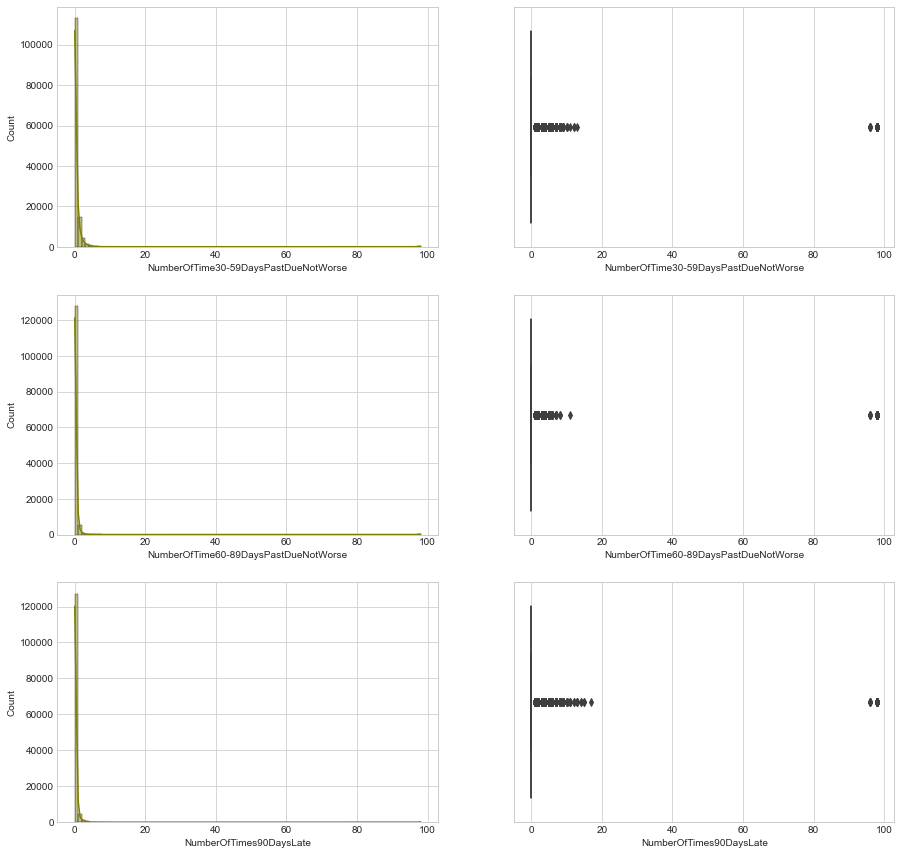

In [61]:
f, axes = plt.subplots(nrows=3,
                       ncols=2, 
                       figsize=(15,15))
sns.histplot(data=credit_train['NumberOfTime30-59DaysPastDueNotWorse'], color="olive", ax=axes[0, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[0, 1], x='NumberOfTime30-59DaysPastDueNotWorse');

sns.histplot(data=credit_train['NumberOfTime60-89DaysPastDueNotWorse'], color="olive", ax=axes[1, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1, 1], x='NumberOfTime60-89DaysPastDueNotWorse');

sns.histplot(data=credit_train['NumberOfTimes90DaysLate'], color="olive", ax=axes[2, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[2, 1], x='NumberOfTimes90DaysLate');

In [62]:
# Look into outliers
credit_train[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 80]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

98    264
96      5
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [63]:
# Look into outliers
credit_train[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 80]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

98    264
96      5
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [64]:
# Look into outliers
credit_train[credit_train['NumberOfTimes90DaysLate'] > 80]['NumberOfTimes90DaysLate'].value_counts()

98    264
96      5
Name: NumberOfTimes90DaysLate, dtype: int64

In [65]:
# We find same value for outliers, same number of records. Same rows? It appears so
credit_train[credit_train['NumberOfTimes90DaysLate'] == 96].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,5.000000,5.0,5.000000,5.0,5.000000,4.000000,5.0,5.0,5.0,5.0,5.000000
mean,0.800000,1.0,33.600000,96.0,0.011962,3754.000000,0.0,96.0,0.0,96.0,0.600000
std,0.447214,0.0,7.635444,0.0,0.022522,782.600792,0.0,0.0,0.0,0.0,0.894427
min,0.000000,1.0,26.000000,96.0,0.000000,2800.000000,0.0,96.0,0.0,96.0,0.000000
25%,1.000000,1.0,29.000000,96.0,0.000000,3325.000000,0.0,96.0,0.0,96.0,0.000000
50%,1.000000,1.0,33.000000,96.0,0.000000,3800.000000,0.0,96.0,0.0,96.0,0.000000
75%,1.000000,1.0,34.000000,96.0,0.008047,4229.000000,0.0,96.0,0.0,96.0,1.000000
max,1.000000,1.0,46.000000,96.0,0.051765,4616.000000,0.0,96.0,0.0,96.0,2.000000


In [66]:
# We find same value for outliers, same number of records. Same rows? It appears so
credit_train[credit_train['NumberOfTimes90DaysLate'] == 98].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,264.000000,2.640000e+02,264.000000,264.0,264.000000,144.000000,264.000000,264.0,264.0,264.0,264.000000
mean,0.541667,9.999999e-01,34.257576,98.0,5.848146,2523.888889,0.007576,98.0,0.0,98.0,0.321970
std,0.499207,3.448228e-15,13.151426,0.0,26.253088,2774.194086,0.086873,0.0,0.0,0.0,0.788782
min,0.000000,9.999999e-01,21.000000,98.0,0.000000,0.000000,0.000000,98.0,0.0,98.0,0.000000
25%,0.000000,9.999999e-01,24.000000,98.0,0.000000,1300.000000,0.000000,98.0,0.0,98.0,0.000000
50%,1.000000,9.999999e-01,28.500000,98.0,0.000000,2041.500000,0.000000,98.0,0.0,98.0,0.000000
75%,1.000000,9.999999e-01,43.250000,98.0,0.000000,3051.000000,0.000000,98.0,0.0,98.0,0.000000
max,1.000000,9.999999e-01,79.000000,98.0,255.000000,28733.000000,1.000000,98.0,0.0,98.0,5.000000


In [67]:
# IT IS VERY SUSPICIOUS THAT THESE RECORDS HAVE THE SAME VALUES IN THESE FIELDS, 96, 98. THEY COULD BE DROPPED (NOTE HOWEVER THAT
# THE RATE OF DEFAULT FOR THESE RECORDS IS HIGH) OR THE OUTLIER VALUES (96, 98) COULD BE CHANGED FOR THE MAX FOR EACH FIELD 
# IMMEDIATELY BELOW THESE VALUES. I WILL NOT DO ANY OF THESE FOR NOW. THESE VALUES COULD HAVE A SPECIAL VALUE LIKE 'NO INFO'
# OR 'NOT PROVIDED'
"""
# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98
# Do not want to drop those records as default is very strong in these cases
credit_train.loc[credit_train['NumberOfTimes90DaysLate'] >= 96, 'NumberOfTimes90DaysLate'] = \
                credit_train[credit_train['NumberOfTimes90DaysLate'] < 96]['NumberOfTimes90DaysLate'].max()
"""

"\n# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98\n# Do not want to drop those records as default is very strong in these cases\ncredit_train.loc[credit_train['NumberOfTimes90DaysLate'] >= 96, 'NumberOfTimes90DaysLate'] =                 credit_train[credit_train['NumberOfTimes90DaysLate'] < 96]['NumberOfTimes90DaysLate'].max()\n"

In [68]:
# SEE COMMENT ABOVE
'''
# Check
credit_train['NumberOfTimes90DaysLate'].describe()
'''

"\n# Check\ncredit_train['NumberOfTimes90DaysLate'].describe()\n"

In [69]:
# SEE COMMENT ABOVE
'''
# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98
credit_train.loc[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] >= 96, 'NumberOfTime60-89DaysPastDueNotWorse'] = \
        credit_train[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] < 96]['NumberOfTime60-89DaysPastDueNotWorse'].max()
'''

"\n# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98\ncredit_train.loc[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] >= 96, 'NumberOfTime60-89DaysPastDueNotWorse'] =         credit_train[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] < 96]['NumberOfTime60-89DaysPastDueNotWorse'].max()\n"

In [70]:
# SEE COMMENT ABOVE
'''
# Check
credit_train['NumberOfTime60-89DaysPastDueNotWorse'].describe()
'''

"\n# Check\ncredit_train['NumberOfTime60-89DaysPastDueNotWorse'].describe()\n"

In [71]:
# SEE COMMENT ABOVE
'''
# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98
credit_train.loc[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] >= 96, 'NumberOfTime30-59DaysPastDueNotWorse'] = \
        credit_train[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['NumberOfTime30-59DaysPastDueNotWorse'].max()
'''

"\n# Remove outliers. We will impute the max of the variable to the rows where the variable is 96, 98\ncredit_train.loc[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] >= 96, 'NumberOfTime30-59DaysPastDueNotWorse'] =         credit_train[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['NumberOfTime30-59DaysPastDueNotWorse'].max()\n"

In [72]:
# SEE COMMENT ABOVE
'''
# Check
credit_train['NumberOfTime30-59DaysPastDueNotWorse'].describe()
'''

"\n# Check\ncredit_train['NumberOfTime30-59DaysPastDueNotWorse'].describe()\n"

In [73]:
# Lets find correlation among these variables
cr_due1 = credit_train[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', \
                        'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']]
cr_due1.head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0,2,0,0,1
1,0,0,0,0
2,1,0,1,0
3,0,0,0,0
4,1,0,0,0


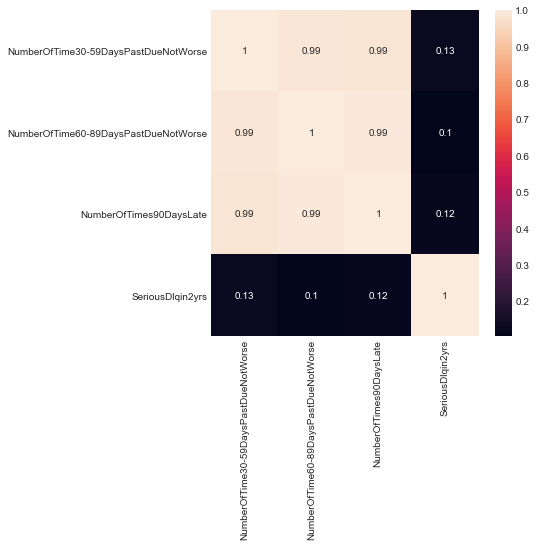

In [74]:
corr = cr_due1.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt=".2g");

In [75]:
# High correlation among past due features -> Options: drop 2 features and keep 1 or combine the three features and 
# make a binary feature that classify if a borrower defaulted any loan/credit payment. I will go with the second option
credit_train['CombinedDefaulted'] = (credit_train['NumberOfTimes90DaysLate'] + \
                                     credit_train['NumberOfTime60-89DaysPastDueNotWorse']) + \
                                     credit_train['NumberOfTime30-59DaysPastDueNotWorse']
credit_train['CombinedDefaulted'].describe()

count    134783.000000
mean          0.991794
std          13.144574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         294.000000
Name: CombinedDefaulted, dtype: float64

In [76]:
# Make the new variable binary
credit_train.loc[(credit_train['CombinedDefaulted'] >= 1), 'CombinedDefaulted'] = 1
credit_train['CombinedDefaulted'].describe()

count    134783.000000
mean          0.205508
std           0.404074
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CombinedDefaulted, dtype: float64

In [77]:
# Let's check correlation with this new variable
cr_due2 = credit_train[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', \
                        'NumberOfTimes90DaysLate', 'CombinedDefaulted', 'SeriousDlqin2yrs']]

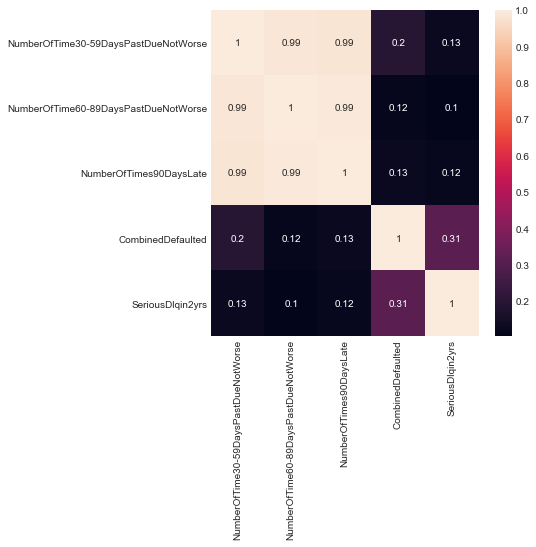

In [78]:
corr = cr_due2.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt=".2g");

In [79]:
# This new combined variable appears to be more correlated with the Target variable that the 'individual' features

In [80]:
# UNIVARIATE ANALYSIS
# NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines
credit_train[['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']].describe()

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
count,134783.000000,134783.000000
mean,8.345748,0.957584
std,5.164550,1.123763
min,0.000000,0.000000
25%,5.000000,0.000000
50%,8.000000,1.000000
75%,11.000000,2.000000
max,58.000000,54.000000


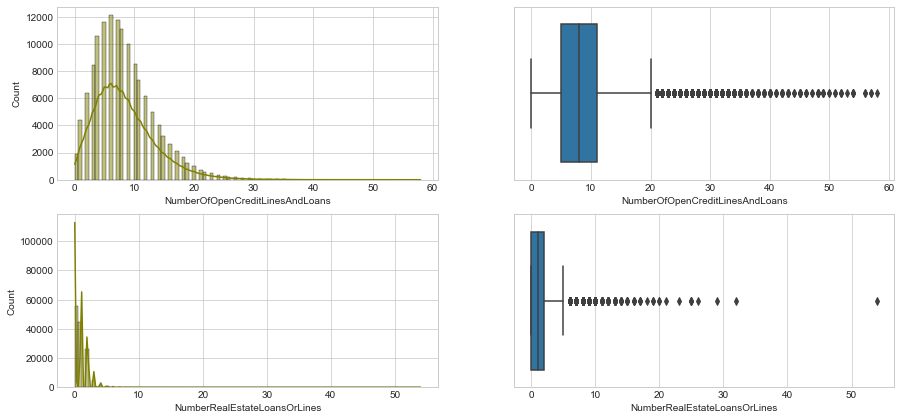

In [81]:
f, axes = plt.subplots(nrows=2,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['NumberOfOpenCreditLinesAndLoans'], color="olive", ax=axes[0, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[0, 1], x='NumberOfOpenCreditLinesAndLoans');

sns.histplot(data=credit_train['NumberRealEstateLoansOrLines'], color="olive", ax=axes[1, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1, 1], x='NumberRealEstateLoansOrLines');

In [82]:
# Look into outliers
credit_train[credit_train['NumberOfOpenCreditLinesAndLoans'] >= 50]['NumberOfOpenCreditLinesAndLoans'].value_counts()

54    4
52    3
57    2
56    2
51    2
50    2
58    1
53    1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [83]:
credit_train[credit_train['NumberOfOpenCreditLinesAndLoans'] >= 50]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.882353
1    0.117647
Name: SeriousDlqin2yrs, dtype: float64

In [84]:
# Look into outliers
credit_train[credit_train['NumberRealEstateLoansOrLines'] >= 25]['NumberRealEstateLoansOrLines'].value_counts()

25    3
54    1
29    1
26    1
32    1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [85]:
credit_train[credit_train['NumberRealEstateLoansOrLines'] >= 25]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.714286
1    0.285714
Name: SeriousDlqin2yrs, dtype: float64

In [86]:
# I will not drop any outliers for now as they appear to add consistent information on the target variable. Candidates 
# for dropping: NumberRealEstateLoansOrLines - 32, 54.

In [87]:
# UNIVARIATE ANALYSIS
# Monthly income
credit_train['MonthlyIncome'].describe().apply("{0:.2f}".format)

count     119233.00
mean        6714.88
std        14433.44
min            0.00
25%         3449.00
50%         5416.00
75%         8281.00
max      3008750.00
Name: MonthlyIncome, dtype: object

In [88]:
# Number of NaN values
credit_train['MonthlyIncome'].isnull().sum()

15550

In [89]:
# Fill NaN values with median
credit_train['MonthlyIncome'].fillna(credit_train['MonthlyIncome'].median(), inplace=True)

In [90]:
# Check
credit_train['MonthlyIncome'].isnull().sum()

0

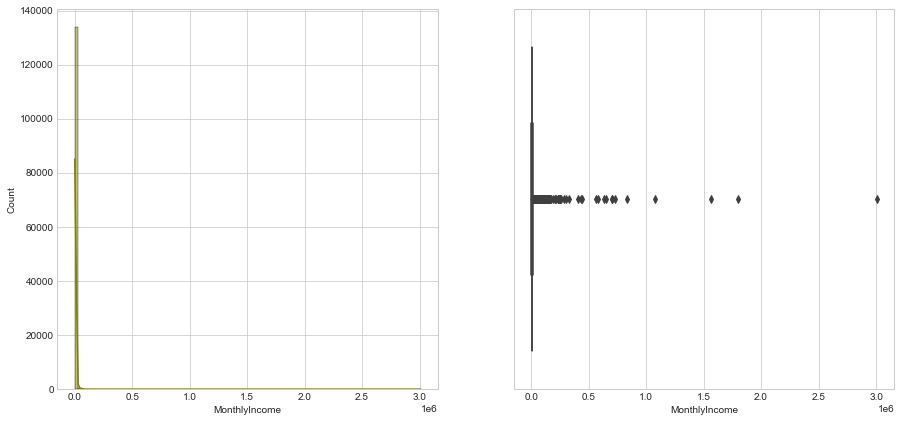

In [91]:
f, axes = plt.subplots(nrows=1,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['MonthlyIncome'], color="olive", ax=axes[0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1], x='MonthlyIncome');


In [92]:
# Look into outliers. As per below, information of these rows appear consistent. Will leave as is for now.
credit_train[credit_train['MonthlyIncome'] > 1000000]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted
50640,0,0.469025,44.0,1,0.004537,1072500.0,9,0,2,0,1.0,1
73763,0,0.007328,52.0,0,0.001470,3008750.0,10,0,1,0,3.0,0
111365,0,0.163856,44.0,0,0.004013,1560100.0,12,0,4,0,2.0,0
137140,0,0.000000,68.0,0,0.002776,1794060.0,15,0,1,0,0.0,0


In [93]:
# Look into outliers / inconsistencies
credit_train[credit_train['MonthlyIncome'] <= 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted
14,0,0.019657,76.0,0,477.0,0.0,6,0,1,0,0.0,0
167,0,0.020966,29.0,0,639.5,1.0,3,0,1,0,2.0,0
195,1,0.025892,38.0,0,74.5,1.0,13,0,0,0,2.0,0
217,0,0.222696,42.0,0,800.0,1.0,3,0,1,0,2.0,0
298,0,0.085152,25.0,0,1005.0,0.0,5,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149381,0,0.094997,57.0,0,262.5,1.0,6,0,0,0,0.0,0
149494,0,1.000000,50.0,3,244.5,1.0,0,0,0,0,0.0,1
149562,0,0.230799,72.0,0,430.0,0.0,7,0,0,0,0.0,0
149646,0,0.080084,69.0,0,1248.0,0.0,8,0,1,0,1.0,0


In [94]:
credit_train[credit_train['MonthlyIncome'] <= 1]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.970482
1    0.029518
Name: SeriousDlqin2yrs, dtype: float64

In [95]:
credit_train[credit_train['MonthlyIncome'] <= 1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,0.029518,0.302641,46.191505,0.766019,371.416847,0.316055,5.610511,0.698344,0.290137,0.679626,0.587473,0.142549
std,0.169313,0.374998,18.266382,7.867644,392.997182,0.465102,4.200340,7.870192,0.555348,7.867803,1.058322,0.349738
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.019637,29.000000,0.000000,25.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.099531,44.000000,0.000000,223.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.527118,61.000000,0.000000,671.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.832335,97.000000,98.000000,1267.000000,1.000000,25.000000,98.000000,3.000000,98.000000,6.000000,1.000000


In [96]:
# As we can see above, data for Monthly income = 0, 1 is not consistent: income very low or non-existent, 
# default rate less than average, debt ratio very high. I think we can drop these rows.

credit_train.shape

(134783, 12)

In [97]:
credit_train = credit_train[credit_train['MonthlyIncome'] > 1]

In [98]:
# Check number of records
credit_train.shape

(133394, 12)

In [99]:
# Check rows
credit_train[credit_train['MonthlyIncome'] <= 1].count()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
CombinedDefaulted                       0
dtype: int64

In [100]:
## BIVARIATE ANALYSIS

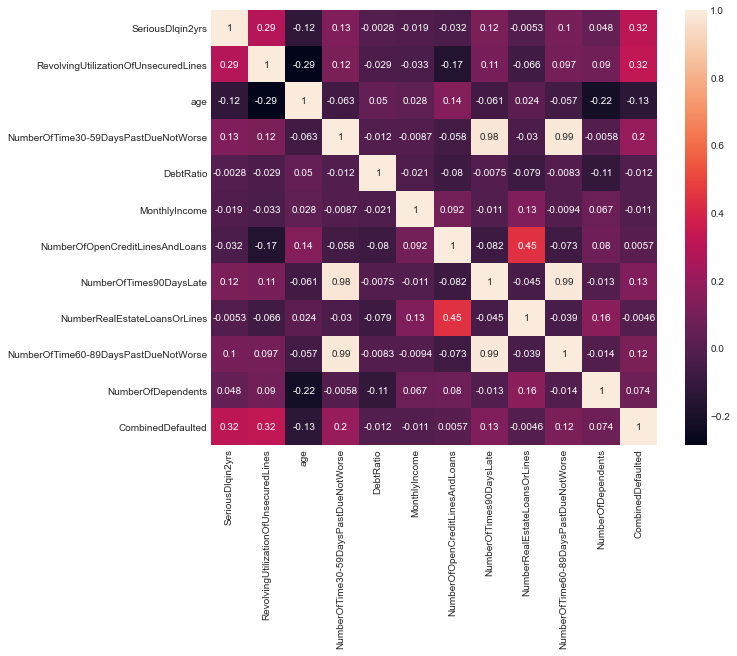

In [101]:
# New correlation matrix

corr = credit_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g");

In [102]:
# We can see a couple of significant changes regarding our target variable, SeriousDlqin2yrs:
# - Some correlation with CombinedDefaulted
# - Some correlation with RevolvingUtilizationOfUnsecuredLines

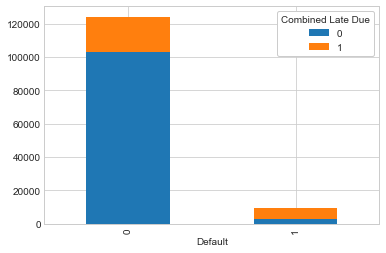

In [128]:
df_plot = credit_train.groupby(['CombinedDefaulted', 'SeriousDlqin2yrs']).size().reset_index().pivot(columns='CombinedDefaulted', index='SeriousDlqin2yrs', values=0)
df_plot.plot(kind='bar', stacked=True);
plt.xlabel('Default')
#plt.ylabel('Default')
plt.legend(loc = 'upper right', framealpha=1, frameon=True, title='Combined Late Due');

<Figure size 2160x720 with 0 Axes>

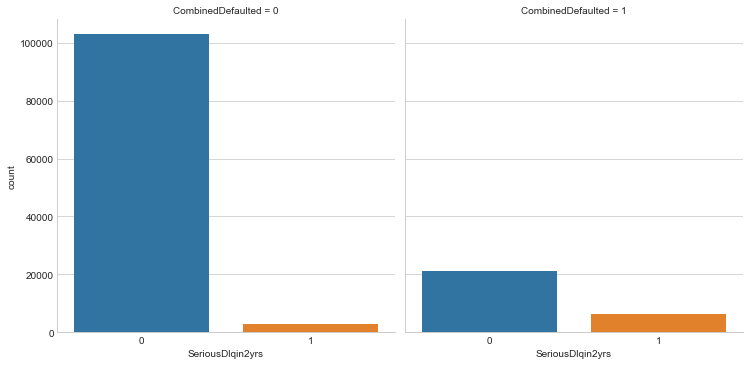

In [104]:
plt.figure(figsize=(30,10));
sns.catplot(x="SeriousDlqin2yrs",
            col="CombinedDefaulted",
            col_wrap=4,
            data=credit_train,
            kind="count");

In [129]:
credit_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    133394.000000
mean          0.326554
std           0.363567
min           0.000000
25%           0.030018
50%           0.157402
75%           0.568686
max           3.996008
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

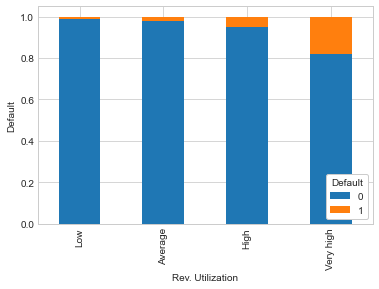

In [130]:
bins=[0, 0.03, 0.15, 0.56, 4]
group=['Low', 'Average', 'High', 'Very high']
credit_train['Revolv_bin']=pd.cut(credit_train['RevolvingUtilizationOfUnsecuredLines'], bins, labels=group)

Income_bin=pd.crosstab(credit_train['Revolv_bin'], credit_train['SeriousDlqin2yrs'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4));
plt.xlabel('Rev. Utilization')
plt.ylabel('Default')
plt.legend(loc = 'lower right', framealpha=1, frameon=True, title='Default');

In [132]:
credit_train['MonthlyIncome'].describe().apply("{0:.2f}".format)

count     133394.00
mean        6633.38
std        13635.58
min            2.00
25%         3750.00
50%         5416.00
75%         7853.00
max      3008750.00
Name: MonthlyIncome, dtype: object

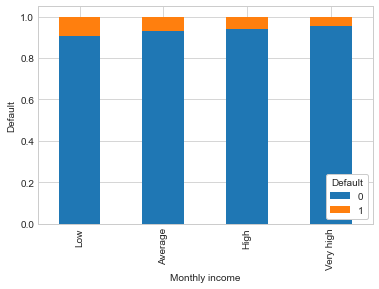

In [133]:
bins=[0, 3750, 5416, 7853, 3008750]
group=['Low', 'Average', 'High', 'Very high']
credit_train['Income_bin']=pd.cut(credit_train['MonthlyIncome'], bins, labels=group)

Income_bin=pd.crosstab(credit_train['Income_bin'], credit_train['SeriousDlqin2yrs'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4));
plt.xlabel('Monthly income')
plt.ylabel('Default')
#P=plt.ylabel('Default')
plt.legend(loc = 'lower right', framealpha=1, frameon=True, title='Default');

In [125]:
credit_train['DebtRatio'].describe()

count    133394.000000
mean         42.550449
std         179.173919
min           0.000000
25%           0.153664
50%           0.322271
75%           0.574722
max        1267.000000
Name: DebtRatio, dtype: float64

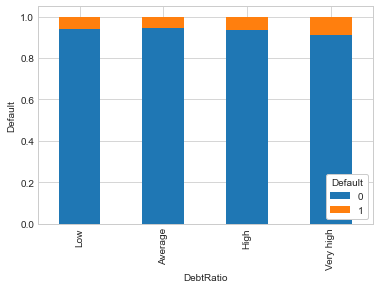

In [126]:
bins=[0, 0.15, 0.32, 0.50, 1300]
group=['Low', 'Average', 'High', 'Very high']
credit_train['DebtRatio_bin']=pd.cut(credit_train['DebtRatio'], bins, labels=group)

Income_bin=pd.crosstab(credit_train['DebtRatio_bin'], credit_train['SeriousDlqin2yrs'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4));
plt.xlabel('DebtRatio')
plt.ylabel('Default')
plt.legend(loc = 'lower right', framealpha=1, frameon=True, title='Default');